# Robustness Eval by Masking Gene Expressions

The basic idea to evaluate robustness by masking X% gene expression and compare the zero-shot tasks (batch integration & cell type labeling) results.

## Step 2: Comparison
In this section, we compare clustering metrics (e.g., ASW_label, ASW_batch, etc.) after masking different percentages of gene expression, to provide a clear understanding of the foundation model’s robustness.

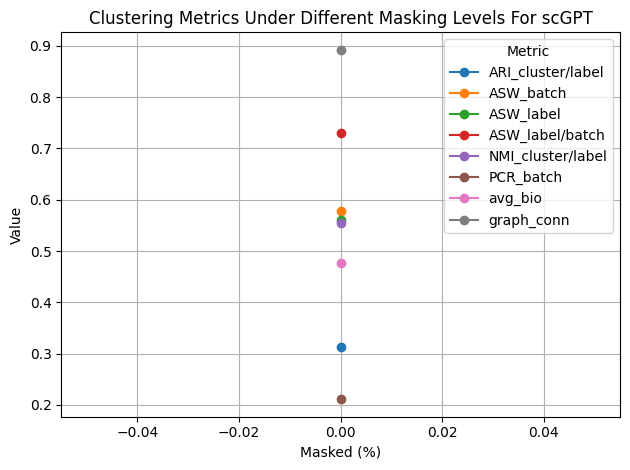

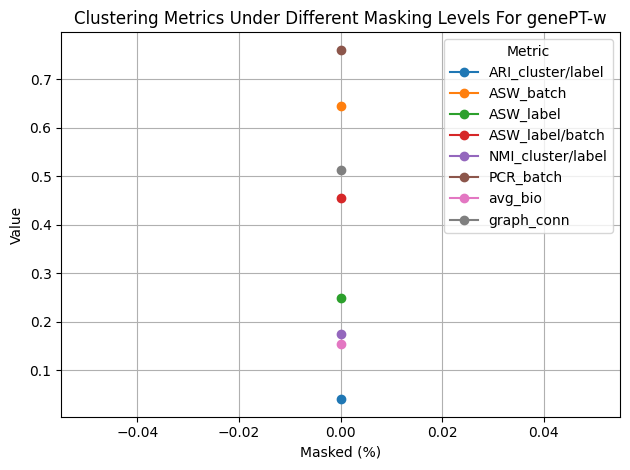

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

for model in {'scGPT', 'genePT-w'}:
    data_df = pd.DataFrame()
    # Read evaluation output
    masked_zero_metrics = pd.read_csv(f'../pbmc/eval/X_{model}__metrics.csv')
    masked_zero_metrics['masked_pct'] = 0
    data_df = pd.concat([masked_zero_metrics, data_df])

    # Create a pivot table
    pivot = data_df.pivot(index='masked_pct', columns='metric', values='value')
    pivot.sort_index(inplace=True)
    pivot.plot(marker='o')

    plt.xlim(0)
    plt.xlabel('Masked (%)')
    plt.ylabel('Value')
    plt.title(f'Clustering Metrics Under Different Masking Levels For {model}')
    plt.legend(title='Metric')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Step 1: Evaluate Zero-shot Tasks After Masking Gene Expressions
### 80% Masked

Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 512)
adata_ has 103526 cells. Taking a subset of 7500 cells.
neighbors in adata.uns found 
 {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'X_scGPT'}} 
to make sure the optimal clustering is calculated for the correct embedding, removing neighbors from adata.uns.
Overwriting calculation of neighbors with sc.pp.neighbors(adata, use_rep=X_scGPT).
neighbors in adata.uns removed, new neighbors calculated: {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'X_scGPT'}}
Evaluating genePT-w model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 1536)
adata_ has 103526 cells. Taking a subset of 7500 cells.

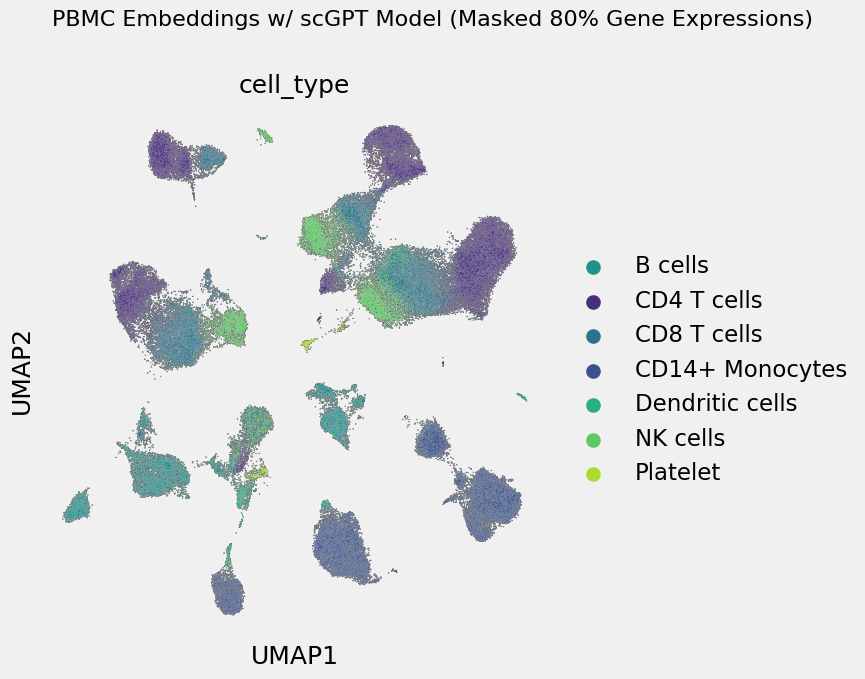

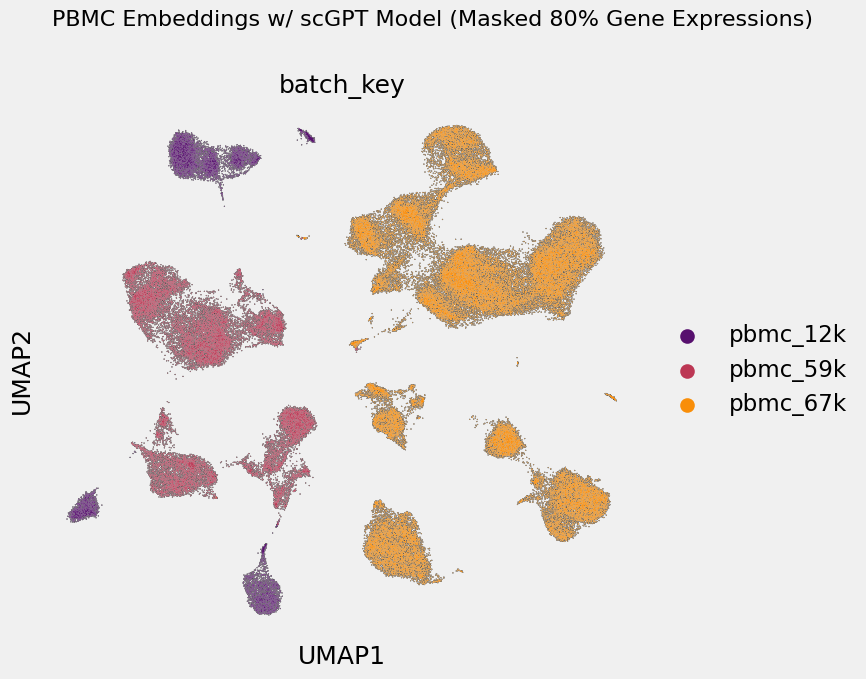

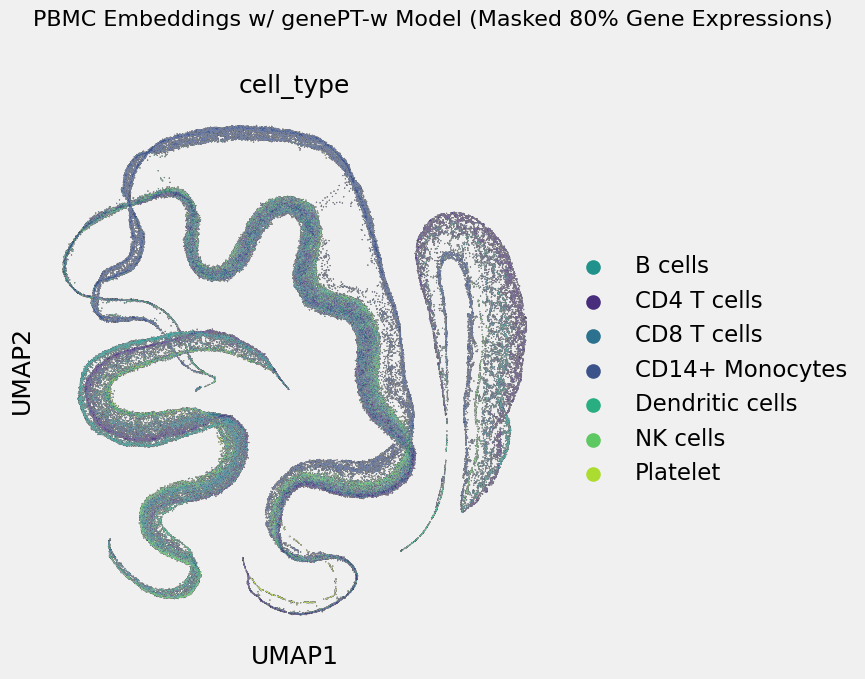

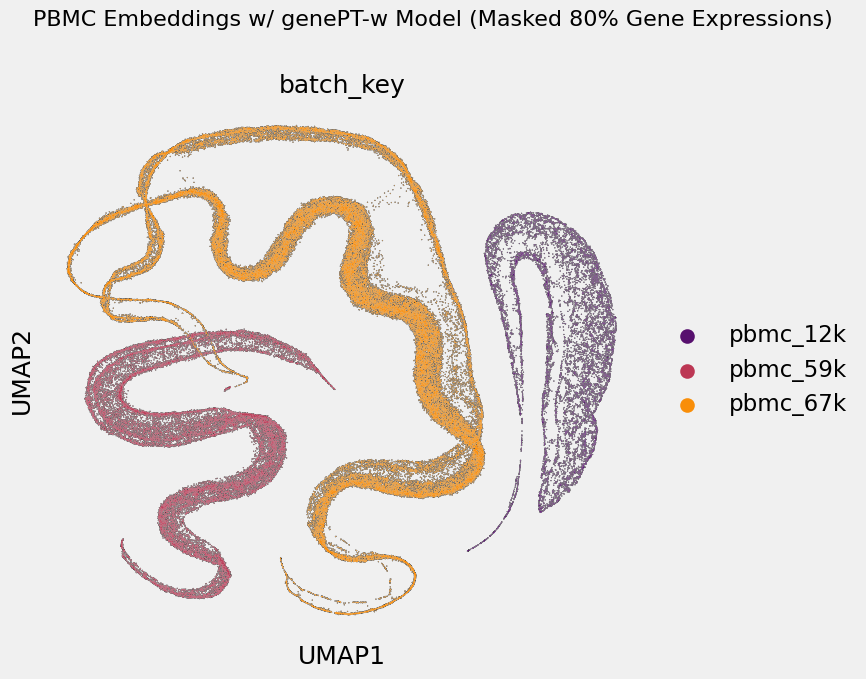

In [3]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

metrics = []
# Evaluate cell labeling capability with 80% sampled gene expression.
for model in {"scGPT", "genePT-w"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'../pbmc_masked_80/{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'../pbmc_masked_80/eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    eval.visualize(return_fig=False, plot_title=f"PBMC Embeddings w/ {model} Model (Masked 80% Gene Expressions)",
                   plot_type='scanpy',
                   n_cells=-1)
    metrics.append(eval.evaluate(n_cells=7500))

print('\n')
for metric in metrics:
    print(metric)
    print('\n')

### 60% Masked

Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 512)
adata_ has 103526 cells. Taking a subset of 7500 cells.
neighbors in adata.uns found 
 {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'X_scGPT'}} 
to make sure the optimal clustering is calculated for the correct embedding, removing neighbors from adata.uns.
Overwriting calculation of neighbors with sc.pp.neighbors(adata, use_rep=X_scGPT).
neighbors in adata.uns removed, new neighbors calculated: {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'X_scGPT'}}
Evaluating genePT-w model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 1536)
adata_ has 103526 cells. Taking a subset of 7500 cells.

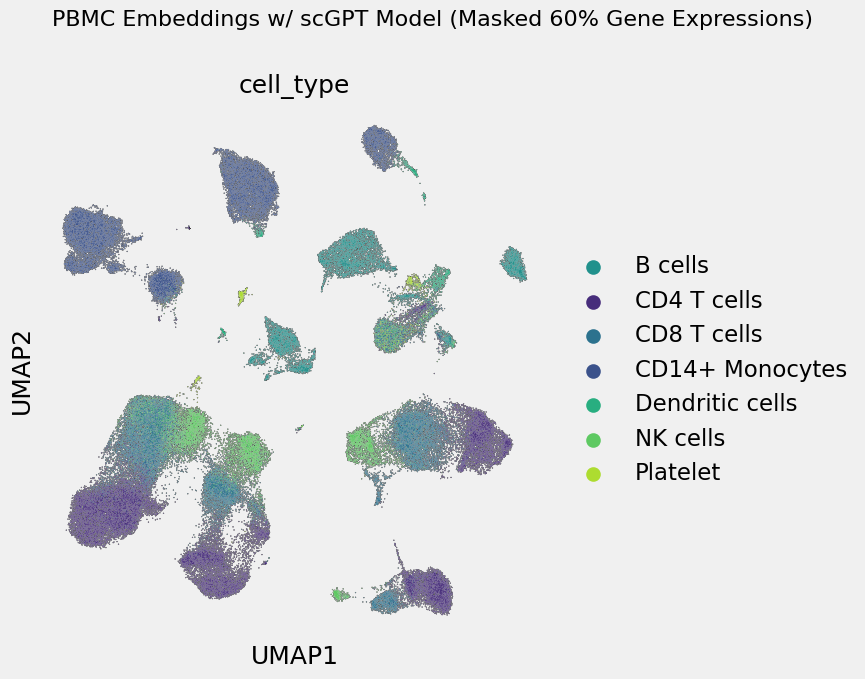

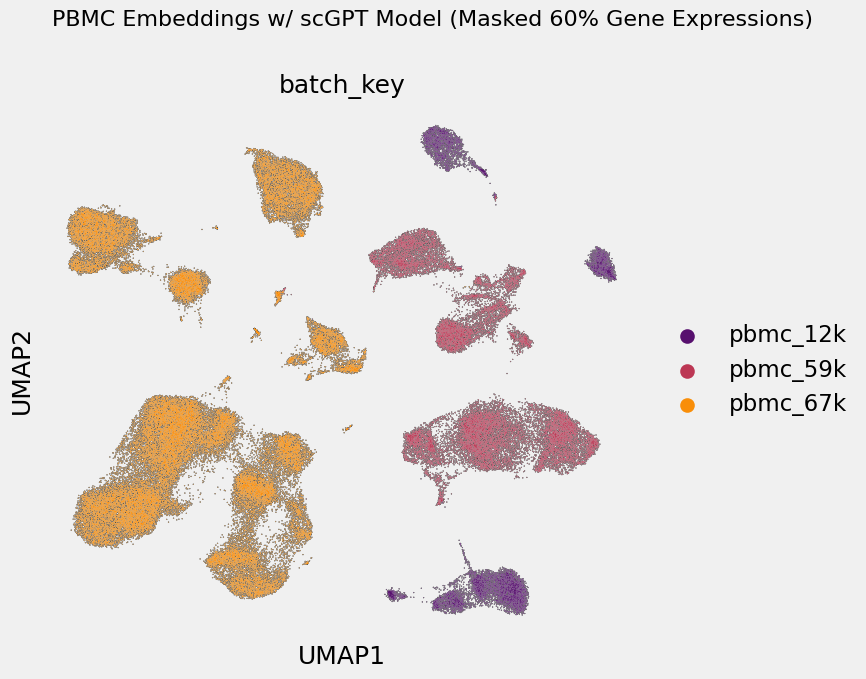

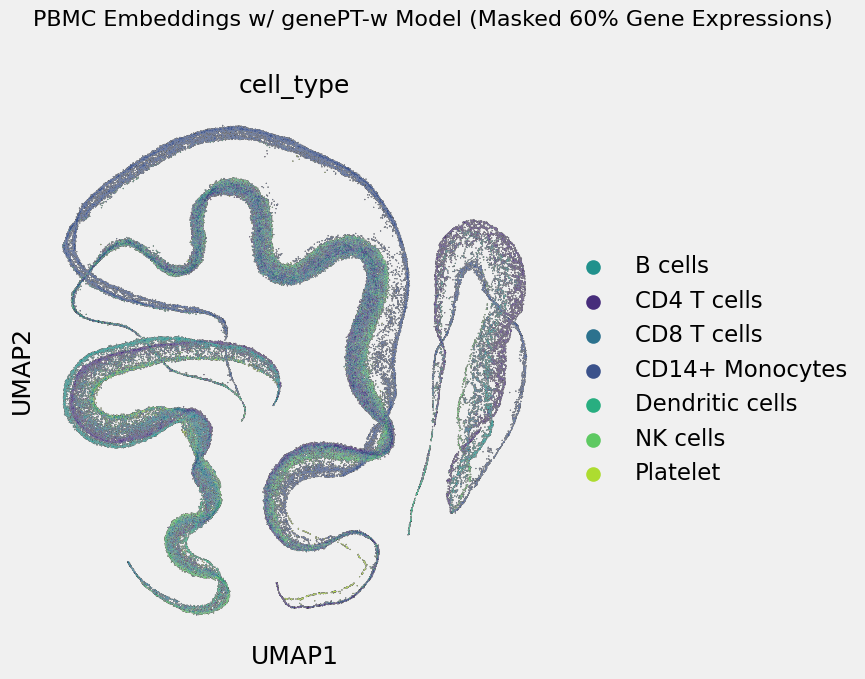

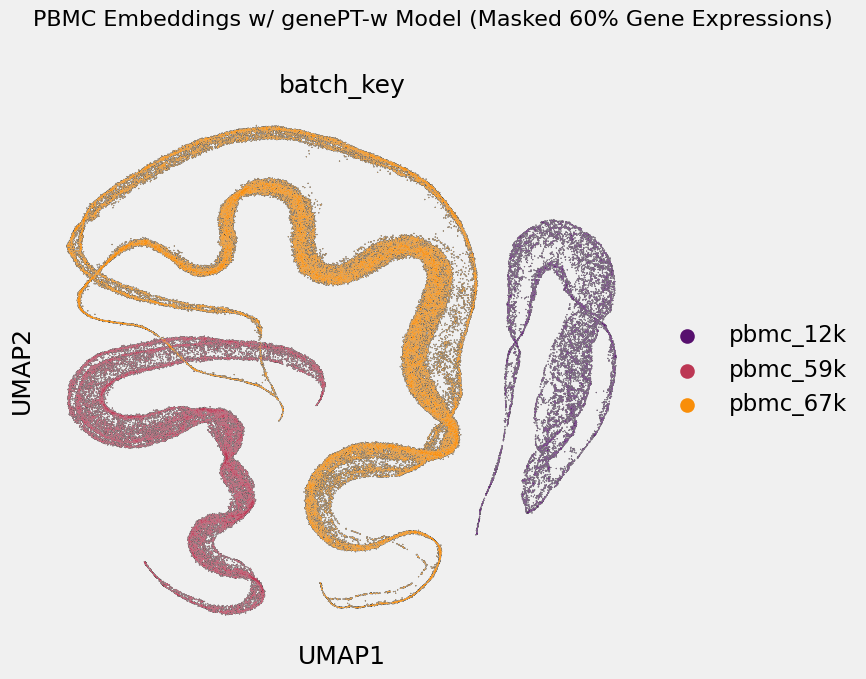

In [2]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

metrics = []
# Evaluate cell labeling capability with 80% sampled gene expression.
for model in {"scGPT", "genePT-w"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'../pbmc_masked_60/{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'../pbmc_masked_60/eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    eval.visualize(return_fig=False, plot_title=f"PBMC Embeddings w/ {model} Model (Masked 60% Gene Expressions)",
                   plot_type='scanpy',
                   n_cells=-1)
    metrics.append(eval.evaluate(n_cells=7500))

print('\n')
for metric in metrics:
    print(metric)
    print('\n')

### 40% Masked

Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 512)
adata_ has 103526 cells. Taking a subset of 7500 cells.
neighbors in adata.uns found 
 {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'X_scGPT'}} 
to make sure the optimal clustering is calculated for the correct embedding, removing neighbors from adata.uns.
Overwriting calculation of neighbors with sc.pp.neighbors(adata, use_rep=X_scGPT).
neighbors in adata.uns removed, new neighbors calculated: {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'X_scGPT'}}
Evaluating genePT-w model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 1536)
adata_ has 103526 cells. Taking a subset of 7500 cells.

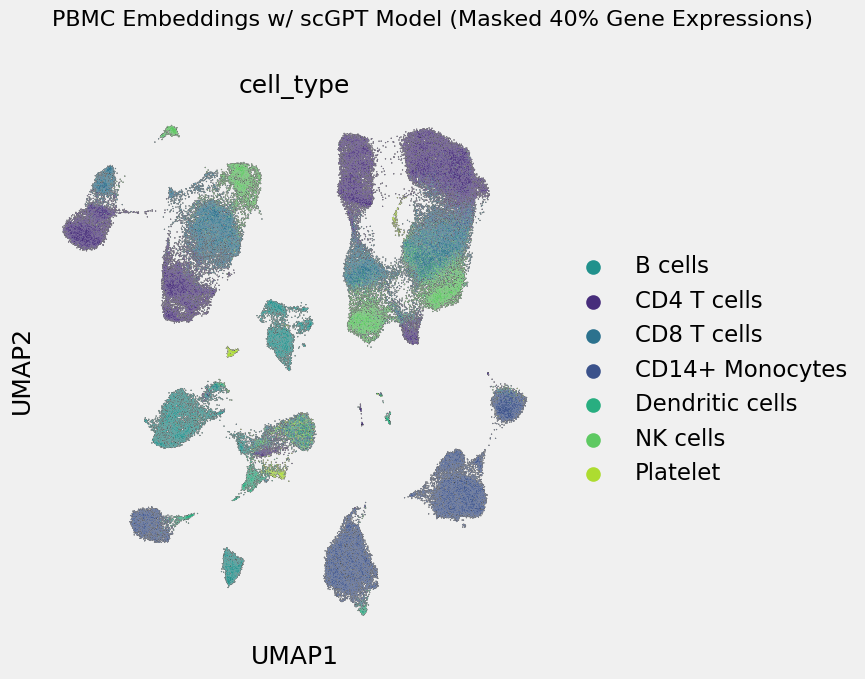

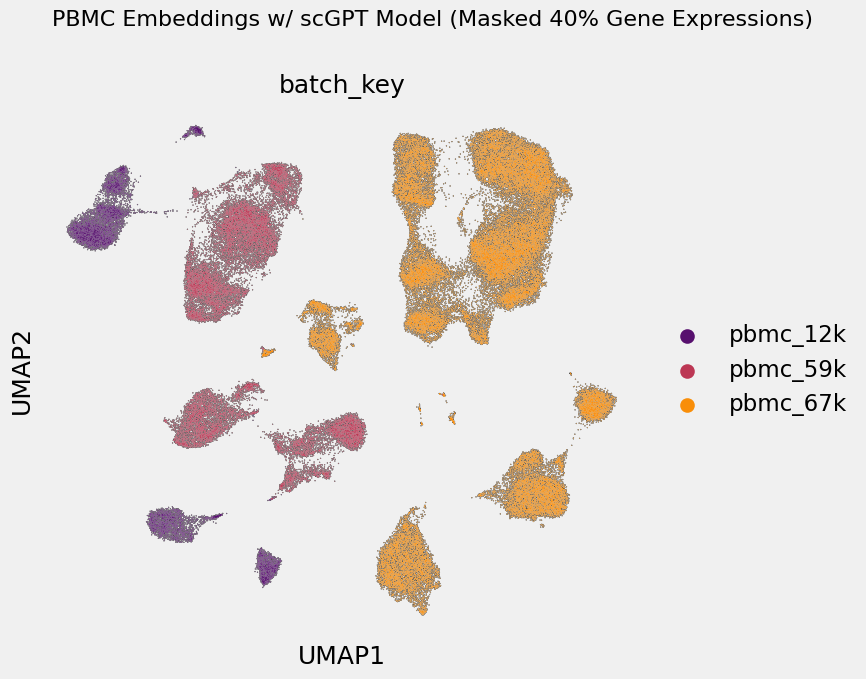

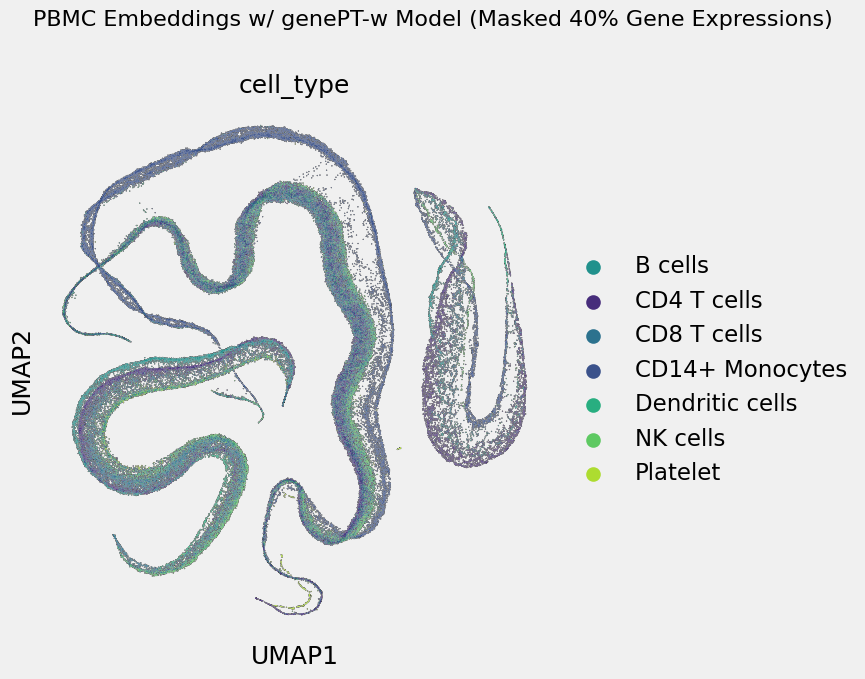

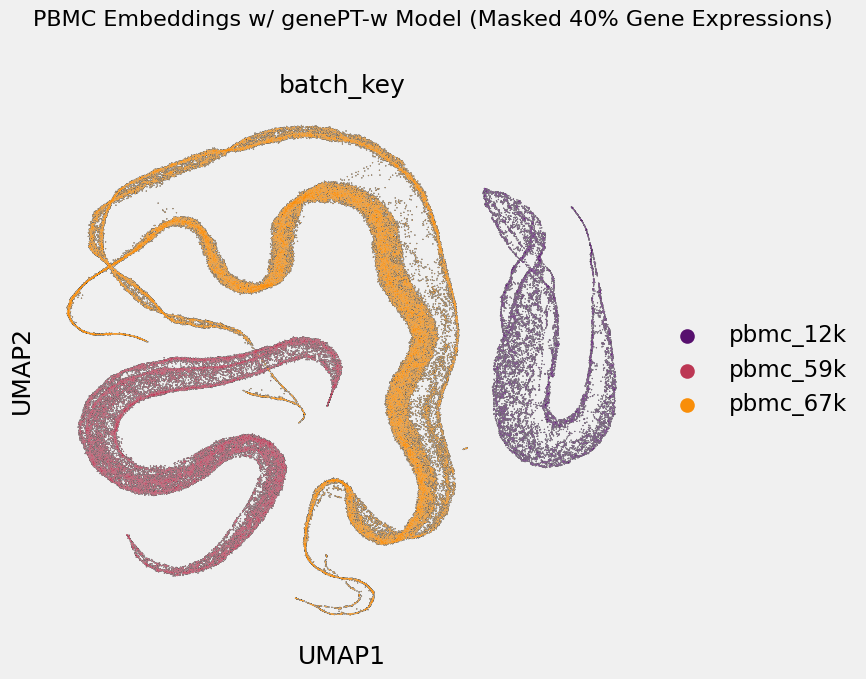

In [1]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

metrics = []
# Evaluate cell labeling capability with 80% sampled gene expression.
for model in {"scGPT", "genePT-w"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'../pbmc_masked_40/{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'../pbmc_masked_40/eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    eval.visualize(return_fig=False, plot_title=f"PBMC Embeddings w/ {model} Model (Masked 40% Gene Expressions)",
                   plot_type='scanpy',
                   n_cells=-1)
    metrics.append(eval.evaluate(n_cells=7500))

print('\n')
for metric in metrics:
    print(metric)
    print('\n')

### 20% Masked

Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 512)
Evaluating Geneformer model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 896)
Evaluating genePT-w model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 1536)


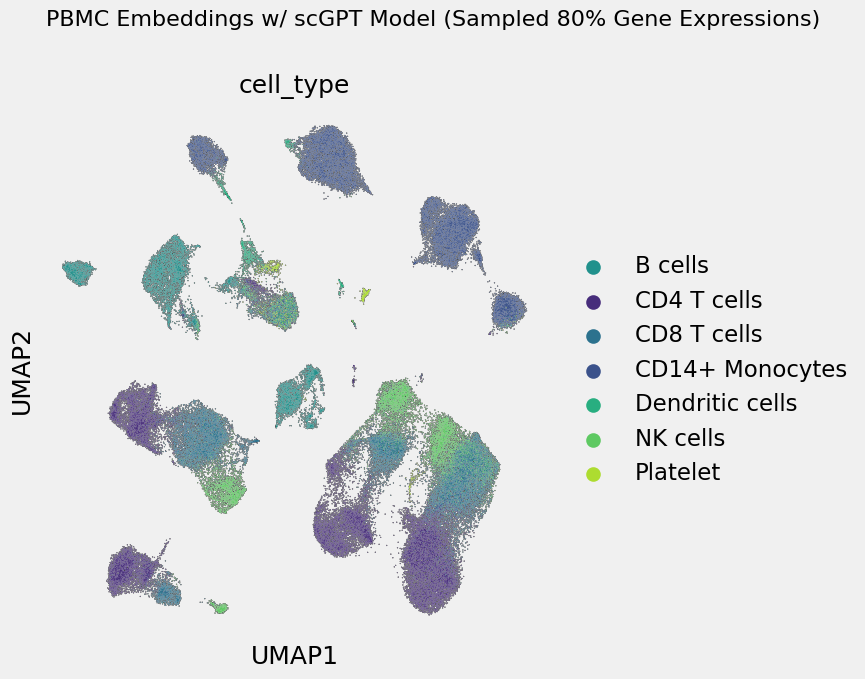

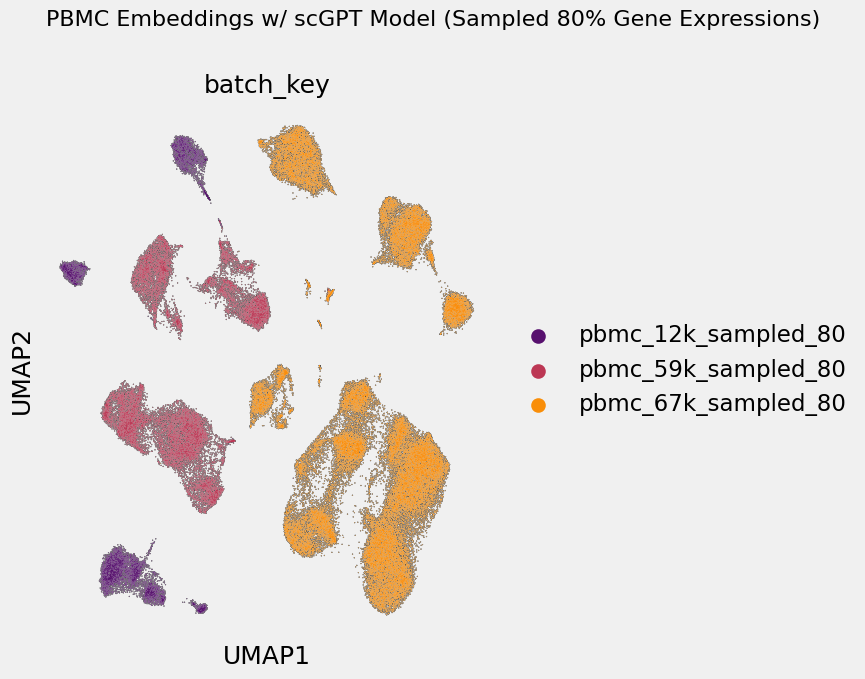

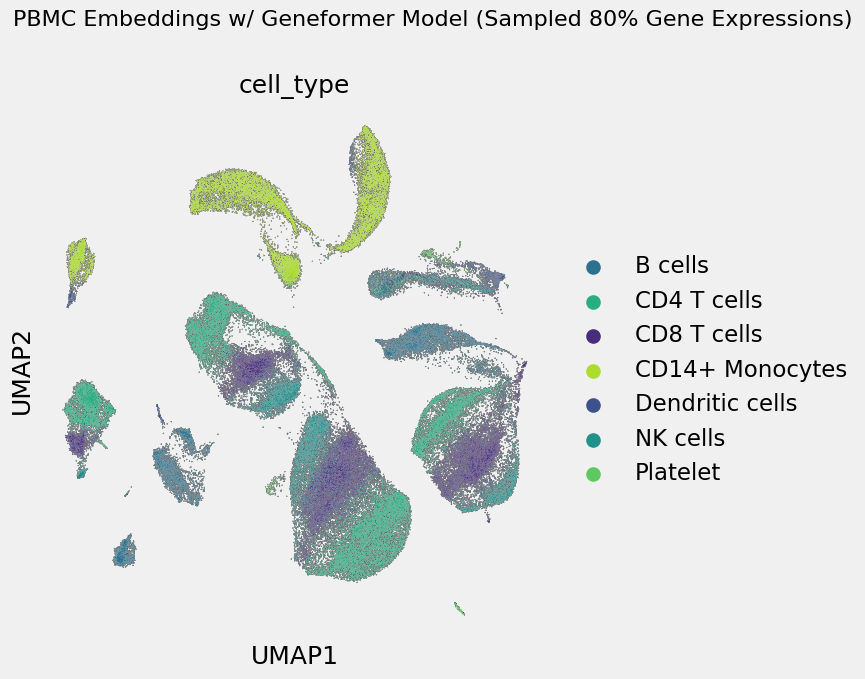

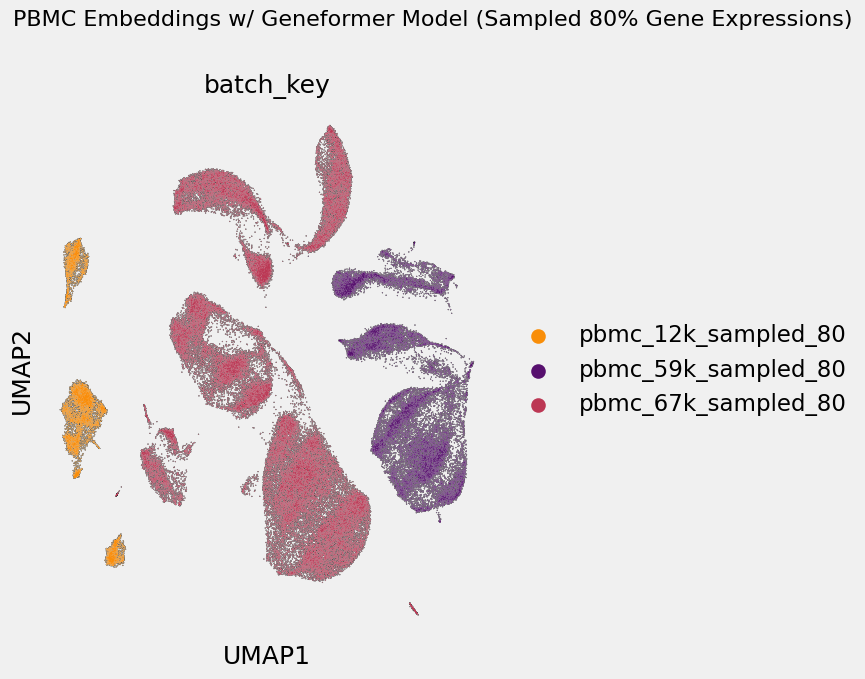

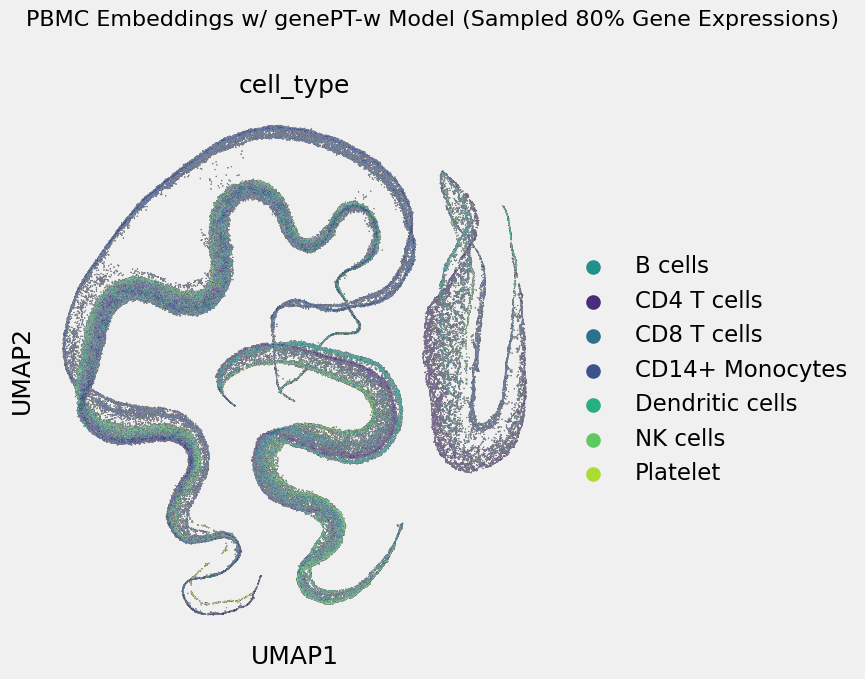

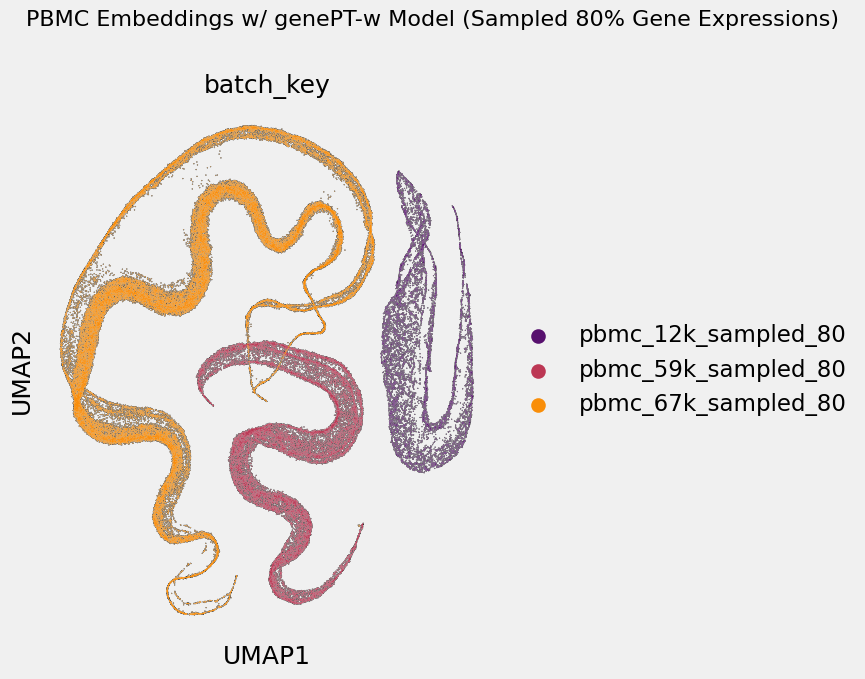

In [1]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

# Evaluate cell labeling capability with 80% sampled gene expression.
for model in {"scGPT", "genePT-w", "Geneformer"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'pbmc_sampled_80/sampled_{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'pbmc_sampled_80/eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    eval.visualize(return_fig=False, plot_title=f"PBMC Embeddings w/ {model} Model (Sampled 80% Gene Expressions)",
                   plot_type='scanpy',
                   n_cells=-1)

In [2]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

# Evaluate cell labeling capability with 80% sampled gene expression.
for model in {"scGPT", "genePT-w", "Geneformer"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'pbmc_sampled_80/sampled_{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'pbmc_sampled_80/eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    print(eval.evaluate(n_cells=7500))
    print('\n')

Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
adata_ has 103526 cells. Taking a subset of 7500 cells.
              metric      label     value
0  NMI_cluster/label  cell_type  0.563412
1  ARI_cluster/label  cell_type  0.308262
2          ASW_label  cell_type  0.561519
3         graph_conn  cell_type  0.887550
4          ASW_batch  cell_type  0.578507
5    ASW_label/batch  cell_type  0.730657
6          PCR_batch  cell_type  0.210987
7            avg_bio  cell_type  0.477731


Evaluating Geneformer model: 103526 out of 138481 cell embeddings after filtering.
adata_ has 103526 cells. Taking a subset of 7500 cells.
              metric      label     value
0  NMI_cluster/label  cell_type  0.514193
1  ARI_cluster/label  cell_type  0.289187
2          ASW_label  cell_type  0.531371
3         graph_conn  cell_type  0.759473
4          ASW_batch  cell_type  0.648709
5    ASW_label/batch  cell_type  0.593332
6          PCR_batch  cell_type  0.422381
7          

Evaluating scGPT model: 53616 out of 119012 cell embeddings after filtering.
	Cell embeddings shape: (53616, 512)
Evaluating Geneformer model: 53616 out of 119012 cell embeddings after filtering.
	Cell embeddings shape: (53616, 896)
Evaluating genePT-w model: 53616 out of 119012 cell embeddings after filtering.
	Cell embeddings shape: (53616, 1536)


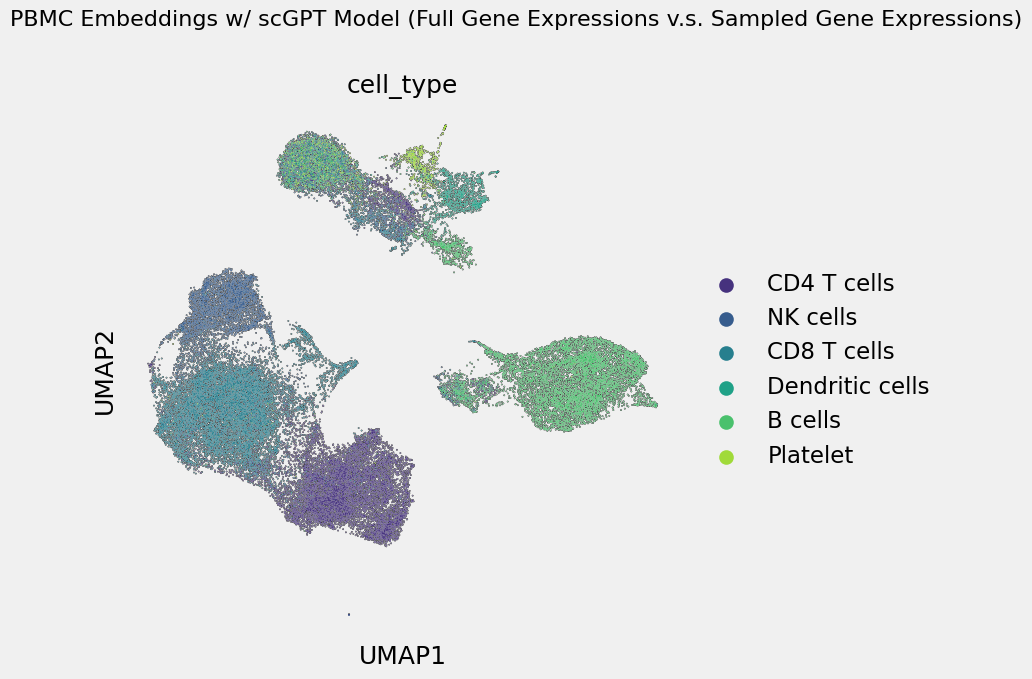

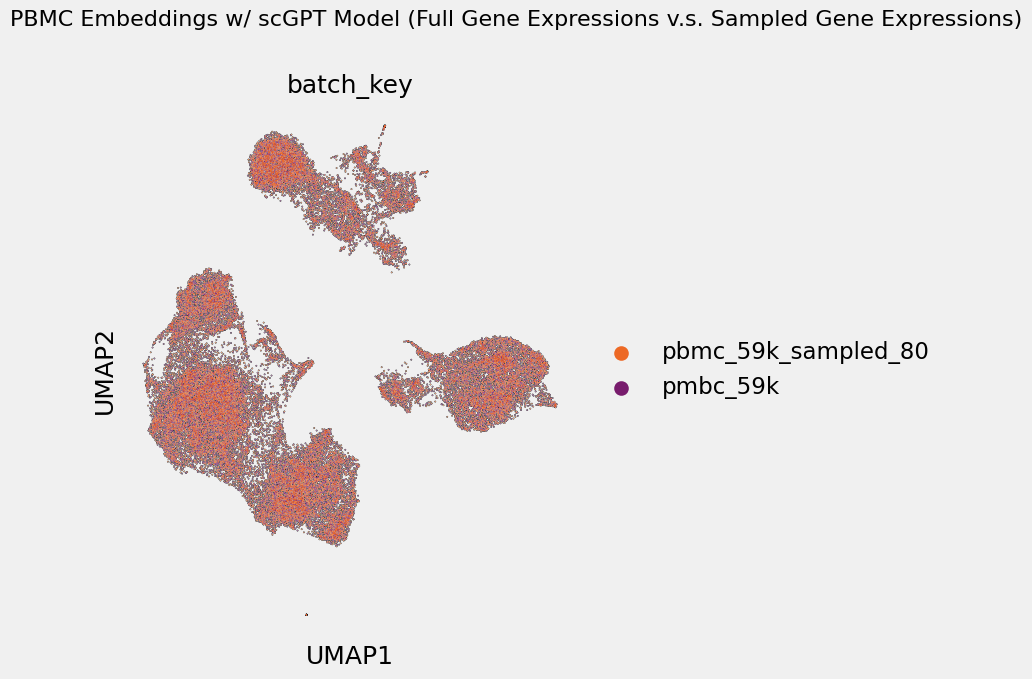

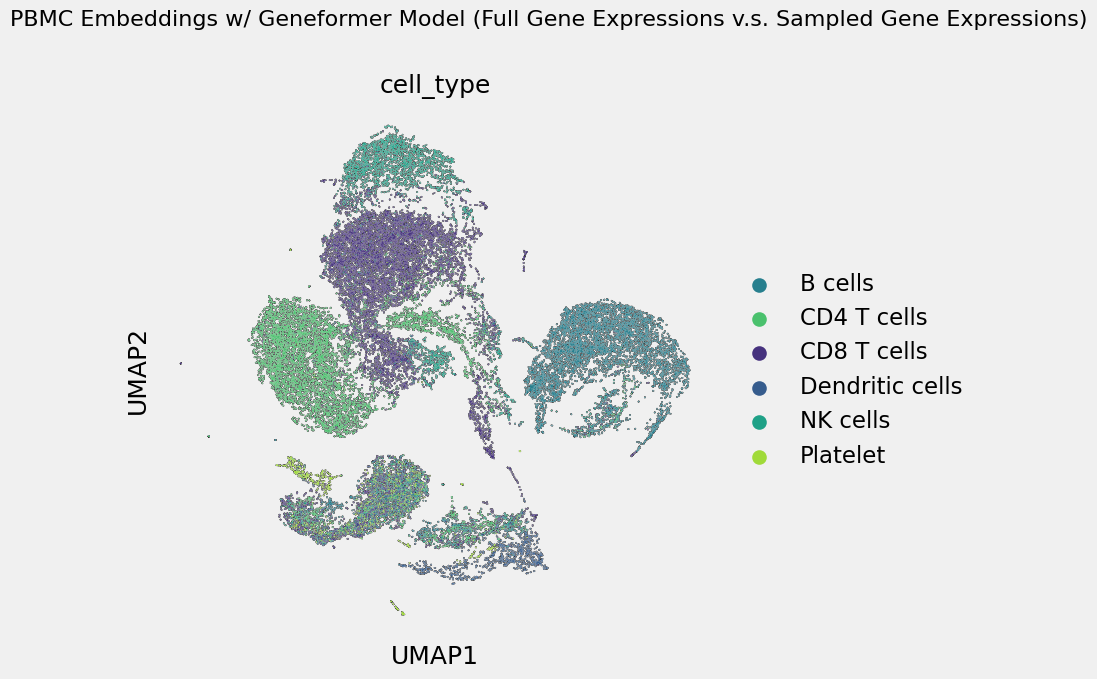

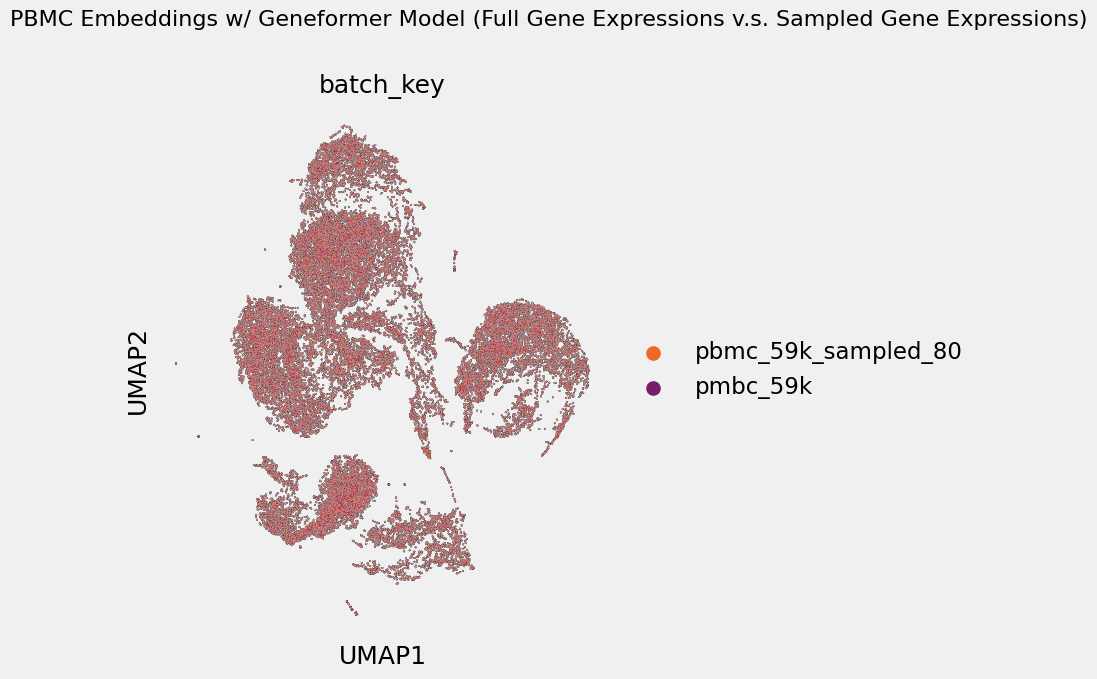

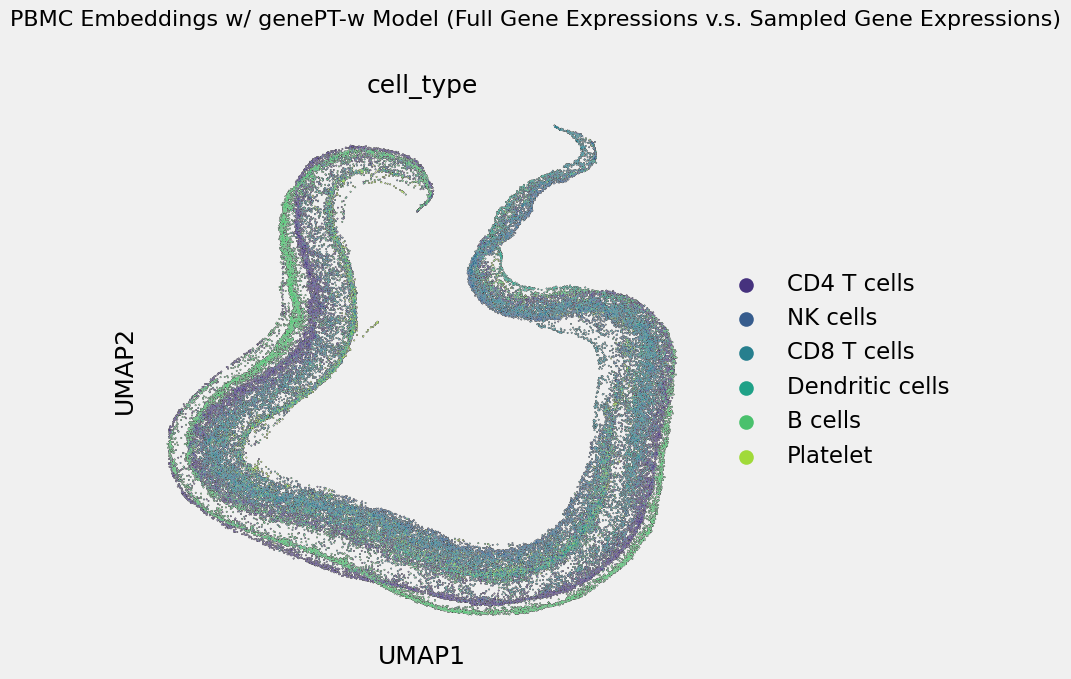

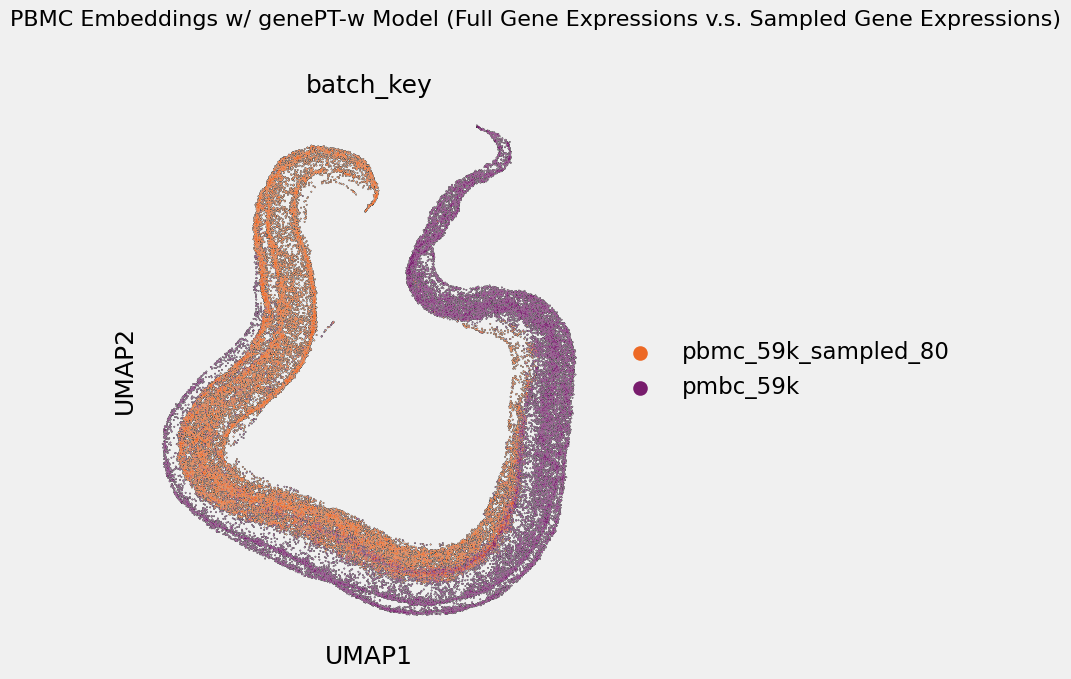

In [7]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

# Compare cell clusters with gene expressions and sampled gene expressions for pbmc 59k dataset.
for model in {"scGPT", "genePT-w", "Geneformer"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'pbmc_sampled_n_full/sampled_{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'pbmc_sampled_n_full/eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    eval.visualize(return_fig=False, plot_title=f"PBMC Embeddings w/ {model} Model (Full Gene Expressions v.s. Sampled Gene Expressions)",
                   plot_type='scanpy',
                   n_cells=-1)

In [8]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

# Compare cell clusters with gene expressions and sampled gene expressions.
for model in {"scGPT", "genePT-w", "Geneformer"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'pbmc_sampled_n_full/sampled_{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'pbmc_sampled_n_full/eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    print(eval.evaluate(n_cells=7500))
    print('\n')

Evaluating scGPT model: 53616 out of 119012 cell embeddings after filtering.
adata_ has 53616 cells. Taking a subset of 7500 cells.
              metric      label     value
0  NMI_cluster/label  cell_type  0.612299
1  ARI_cluster/label  cell_type  0.601297
2          ASW_label  cell_type  0.566181
3         graph_conn  cell_type  0.979672
4          ASW_batch  cell_type  0.500026
5    ASW_label/batch  cell_type  0.979357
6          PCR_batch  cell_type  0.000183
7            avg_bio  cell_type  0.593259


Evaluating Geneformer model: 53616 out of 119012 cell embeddings after filtering.
adata_ has 53616 cells. Taking a subset of 7500 cells.
              metric      label     value
0  NMI_cluster/label  cell_type  0.560307
1  ARI_cluster/label  cell_type  0.576648
2          ASW_label  cell_type  0.534086
3         graph_conn  cell_type  0.975125
4          ASW_batch  cell_type  0.499980
5    ASW_label/batch  cell_type  0.988844
6          PCR_batch  cell_type  0.000121
7            av